# Week 8: Turing Machines

In [1]:
from tock import *
from IPython.display import IFrame, HTML
# Tock's native notation for TMs is different; use Sipser's
# If you get an error here, please upgrade to the latest Tock
settings.display_direction_as = 'alpha' 

In [2]:
%%html
<style>.nbviewer div.output_area { overflow-y: auto; max-height: 480px; }</style>

## Changes in notes format

Starting this week, I'm trying to integrate these notebooks more tightly into both the readings and the lectures, in order to make them the hub for all the information that you need to learn in the course.

The sections for Monday and Wednesday readings are gone; instead, I would like everyone to read the section entitled "Tuesday" **before** Tuesday's class, and the section "Thursday" **before** Thursday's class. 

Integrated into the notes are pointers to assigned readings from the textbook; please do these readings as well. The notes may have summaries of the readings which I will use in class, but you're still responsible for the readings.

## Tuesday

We have been climbing up the [Chomsky hierarchy](https://en.wikipedia.org/wiki/Chomsky_hierarchy) of language classes (cf. Figure 4.10):

| Unit | Language class                | Automaton                 | Grammar                      |
|------|:------------------------------|:--------------------------|:-----------------------------|
| III  | Turing-recognizable languages | Turing machines           | *Unrestricted grammars*      |
|      | *Context-sensitive languages* | *Linear bounded automata* | *Context-sensitive grammars* |
| II   | Context-free languages        | Pushdown automata         | Context-free grammars        |
| I    | Regular languages             | Finite automata           | Regular expressions          |

(Cells in italics are not core topics in this course, though we will mention them at some point.)

Now we begin Unit III of the course and finally introduce Turing machines (TMs), which sit at the top of the hierarchy, because, as we will discuss at the end of today's lecture, we think Turing machines define what it is possible to compute.

### Definition of Turing machines

<div class="alert alert-info">
    <p><b>Read</b> both the informal and formal definitions of TMs (165–170). For now, you can skim or skip over the definition of configuration (page 168 at "As a Turing machine computes" through the end of page 169), though we will certainly need it later.</p>
    <p><b>Watch</b> <a href="https://drive.google.com/file/d/1QuP23aBo0H6h6o3u4CD7brD06nYpxPEk/view?usp=sharing">W8E1: Turing Machines</a>.</p>
</div>

There are many variations out there in the definition of TMs. Be careful if you refer to other sources.

The parts of a TM:

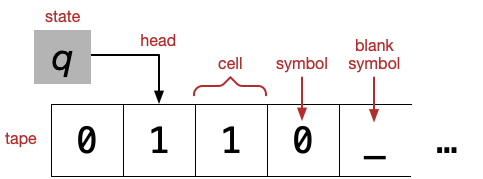

The start configuration:

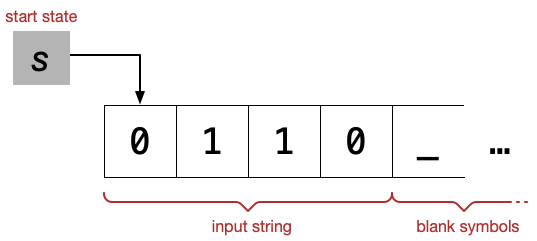

A transition:
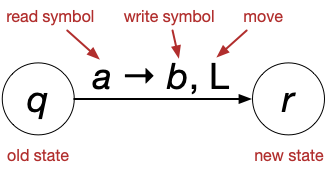

The formal definition of TM implies that it is deterministic: For any state $q$ and symbol $a$, there must be exactly one transition from $q$ on symbol $a$.

If the machine:

- is in state $q$
- the current symbol is $a$

then the machine will:

- write symbol $b$
- move left (L)
- go to state $r$. 

More about moves:

- If the head is already on the leftmost cell and a transition says to move left, the head remains on the leftmost cell.
- The move can be L for "move left" or R for "move right". We also allow S for "stay". (My notes may also have N for "no move", which means exactly the same thing.)

There are three possible outcomes of a TM run:

- If the machine enters the accept state, it halts and accepts the string.
- If the machine enters the reject state, it halts and rejects the string.
- If the machine runs forever, we say that it *loops*.

Looping is something we've never had to worry about before. Deterministic FAs and PDAs can't loop; nondeterministic FAs and PDAs can loop (because of cycles of $\varepsilon$-transitions), but it's always possible to change such machines into an equivalent ones that do not loop. But with Turing machines, the possibility of looping is real and *very* important.

Consequently, there is an important distinction between:

- A language is *Turing-recognizable* (more commonly called "recursively enumerable" or "computably enumerable") if there is a TM that accepts all strings in the language and *rejects or loops on* all strings not in the language.
- A language is (Turing-)decidable (also called "recursive" or "computable") if there is a TM that accepts all strings in the language and *rejects* all strings not in the language.

People have built various [physical](http://aturingmachine.com) [Turing](https://www.youtube.com/watch?v=ivPv_kaYuwk) [machines](https://www.youtube.com/watch?v=40DkJ9vt5CI&t=14s), including TMs made out of [Lego Mindstorms](https://vimeo.com/channels/staffpicks/44202270), [Lego and air tubes](https://videotheque.cnrs.fr/doc=3001), [wood](https://www.youtube.com/watch?v=vo8izCKHiF0), and [Redstone](https://www.youtube.com/watch?v=pJO__eTIqb0).

In [3]:
IFrame(width=560, height=315, src="https://www.youtube.com/embed/E3keLeMwfHY")

In [4]:
IFrame(width=560, height=315, src="https://www.youtube.com/embed/vo8izCKHiF0")

In [5]:
IFrame(width=560, height=315, src="https://www.youtube.com/embed/KrNTmOSVW-U")

### Examples: formal descriptions

<div class="alert alert-info">
    <p><b>Read</b> the book's examples of TMs (170–175).</p>
    <p><b>Watch</b> <a href="https://drive.google.com/file/d/1_kCRC_qrniRV-eUMVDc2KKzRJvrjLcDy/view?usp=sharing">W8E2: Turing Machine Examples</a>.</p>
</div>

Here are the book's two examples of formal descriptions. (Note that if you are Tock to *write* Turing machines, Tock's notation is different from Sipser's; see the Tock documentation.)

Machine $M_2$ recognizes the language $\{\texttt{0}^{2^n} \mid n \geq 0\}$.

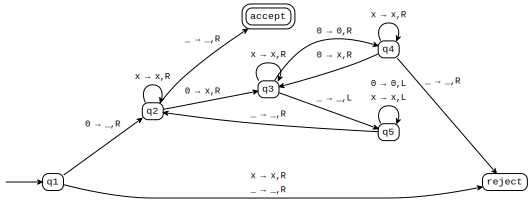

In [6]:
m2 = read_csv("tm-m2.csv")
to_graph(m2)

Here's an example run; try a few different input strings to see how the run changes.

In [7]:
run(m2, "0 0 0 0").only_path()

Machine $M_1$ recognizes the language $\{w\#w \mid w \in \{\texttt{0}, \texttt{1}\}^\ast\}$.

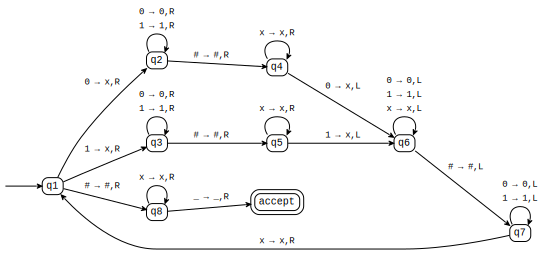

In [8]:
m1 = read_csv("tm-m1.csv")
m1

As explained at the bottom of page 173, the reject state is implicit in this example. You can do this when you write formal descriptions of TMs also.

In [9]:
run(m1, "0 1 1 0 0 0 # 0 1 1 0 0 0").only_path()

### Writing Turing machines

<div class="alert alert-info">
    <p><b>Read</b> the subsection "Terminology for Describing Turing Machines" (184–185).</p>
</div>    

Writing Turing machines is extremely tedious -- much more so than assembly language. Although some authors introduce a mechanism for defining "macros", Sipser takes a totally different approach, proposing three ways of defining Turing machines.

- You've seen formal descriptions. When you are asked for a formal description, either a table or a state diagram is fine.

- You've also seen pseudocode-like descriptions of Turing machines; Sipser calls these _implementation-level descriptions_. These abstract away from states and transitions, but they still speak in terms of the head moving on the tape and reading and writing symbols on the tape. They shouldn't, for example, make use of variables or arithmetic. See the examples in the book to get an idea of what is allowed and what isn't.

- _High-level descriptions_ will come later and abstract even away from the tape.

When we ask you to write a TM, we'll always specify what kind of description we're looking for.

### The Church-Turing thesis

<div class="alert alert-info">
    <p>This section can be read after Tuesday's class.</p>
    <p><b>Read</b> the rest of Section 3.3 (182–184).</p>
    <p><b>Watch</b> <a href="https://drive.google.com/file/d/1KidSVDouVjxdmTYjp9vTSCCQ4KPuGVDN/view?usp=sharing">W8E3: The Church-Turing Thesis</a>.</p>
</div>    

The Church-Turing thesis (CTT) is also often simply called "Church's thesis" but the name "Church-Turing thesis" acknowledges Turing's key role in developing the thesis.

Sipser's concise statement of the thesis is "*Intuitive notion of algorithms* equals *Turing machine algorithms*." It is a thesis (or possibly, a definition), not a theorem. Rather than prove it, we can only give arguments in favor of it.

The first justification comes from Turing's original paper (1936), where proposed Turing machines as a model of what _humans_ do when they compute. He imagined a computing person in an idealized scenario:

- He has an infinitely long paper tape, divided into squares.
- He can write one symbol in each square, and the number of possible symbols is finite (e.g., `0` to `9`).
- He can only look at a finite number of squares at a time. 
- He can only move a finite distance at a time.
- He has only a finite number of “states of mind.”

Basically this is an appeal to intuition that when people compute, this is what they do. Furthermore, he proved (quite briefly) that Turing machines can perform any such computation.

In addition to Turing's original justification, another justification for the CTT, the one more commonly cited today, is that many other proposals have been made for models of computability, and for the most part they have all turned out to be equivalent to Turing machines. The end of Section 3.2 alludes to some of these. The most important ones are probably:

- The [untyped lambda calculus](https://en.wikipedia.org/wiki/Lambda_calculus)
- [Partial recursive functions](https://en.wikipedia.org/wiki/Μ-recursive_function)
- [Unrestricted grammars](https://en.wikipedia.org/wiki/Unrestricted_grammar)

[Accidentally Turing Complete](http://beza1e1.tuxen.de/articles/accidentally_turing_complete.html) is a collection of other weird things that are equivalent to TMs.

An important subcase of this argument is that no matter how we try to augment Turing machines to make them more powerful, it seems to always turn out to be equivalent to standard Turing machines. This is the topic of the next class.

## Thursday

<div class="alert alert-info">
    <p><b>Read</b> page 176.</p>
    <p><b>Watch</b> <a href="https://drive.google.com/file/d/1SQhScGcHZBFMrhu1dUVyoE433K9f2o5V/view?usp=sharing">W8E4: Turing Machine Variants</a>.</p>
</div>    

**Question.** Name every possible thing you could imagine adding to a Turing machine to make it more powerful.

First of all, there were already some extensions in Turing's image of a human computer:

- He is allowed to look at multiple (but finitely many) squares at a time.
- He is allowed to move multiple (but finitely many) squares to the left or right.
- Furthermore, Turing also mentions the possibility of a two-dimensional grid.

Turing argued in his original paper that a TM which can look at multiple squares or move multiple squares can be converted into a standard TM by adding more states. A two dimensional grid can be simulated in a manner similar to multiple tapes (see below).

The book discusses one simple extension ("stay" transitions) and two bigger extensions which are used later: multiple tapes, and nondeterminism.

### Stay transitions

"Stay" transitions are a good example of how to write proofs concerning TM extensions. We want to show: For any TM $M$ with "stay" transitions, there is a standard TM $M'$ that is equivalent to $M$.

If you are asked to show how to construct a *formal description* of $M'$, this doesn't mean you should write a particular formal description; you should write English instructions for how to construct a formal description, like so:

For each stay transition
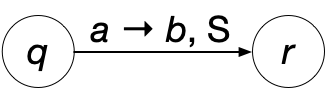

Replace it with the transitions
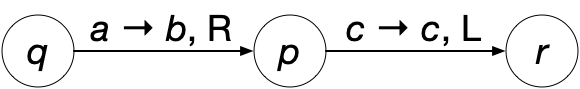

where 
- $p$ is a new state, not used anywhere else in the machine.
- there is a transition from $p$ to $r$ for all possible $c \in \Gamma$.

We could make this more formal still by saying: Given $M = (Q, \Sigma, \Gamma, \delta, q_0, q_{\text{accept}}, q_{\text{reject}})$, where $\delta$ allows stay (S) transitions, construct $M' = (Q, \Sigma, \Gamma, \delta', q_0, q_{\text{accept}}, q_{\text{reject}})$, where

\begin{align*}
\delta'(q, a) &= (r, b, \text{L}) & \text{if}~\delta(q, a) &= (r, b, \text{L}) \\
\delta'(q, a) &= (r, b, \text{R}) & \text{if}~\delta(q, a) &= (r, b, \text{R}) \\
\delta'(q, a) &= (p_{qa}, b, \text{R}) & \text{if}~\delta(q, a) &= (r, b, \text{S}) \\
\delta'(p_{qa}, c) &= (r, c, \text{L}) & \text{if}~\delta(q, a) &= (r, b, \text{S}), \text{for all $c \in \Sigma$} \\
\end{align*}

If you are asked to write an *implementation-level description* of $M'$, it would be something like:

$M' =$ "On input $w$:

1. Simulate $M$ on $w$, with the following modifications:
    - When a transition of $M$ moves left, just move left.
    - When a transition of $M$ moves right, just move right.
    - When a transition of $M$ stays, first move right, then move left.

### Multiple tapes

<div class="alert alert-info">
    <p><b>Read</b> the subsection "Multitape Turing Machines" (176–178).</p>
</div>

Here's an example of a multitape TM that recognizes the language $\{ w \texttt{#} w \mid w \in \{\texttt{0}, \texttt{1}\}^\ast\}$ without having to "zig-zag." The implementation-level description is:

1. Scan right on the first tape, copying symbols to the second tape until $\texttt{#}$ is reached.
2. Move past the $\texttt{#}$ on the first tape and move the second head to the left end.
3. Scan right on both tapes, checking at each step that the symbols under both heads are equal.
4. If so, *accept*; else, *reject*.

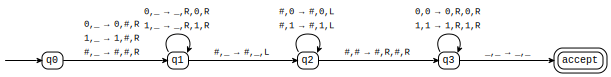

In [10]:
mtm = read_csv("multitape.csv")
mtm

In [11]:
run(mtm, '1 0 1 # 1 0 1').only_path()

The reduction to standard TMs converts a multitape configuration like this:

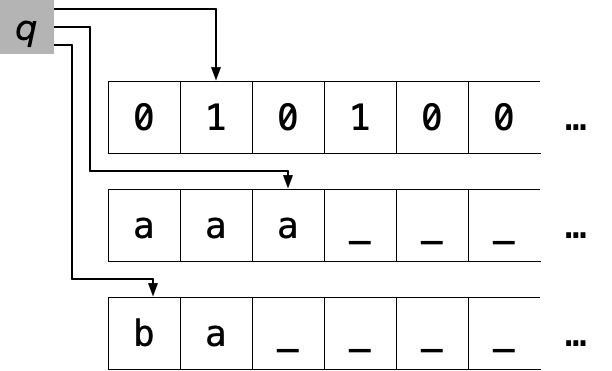

Into a single-tape configuration like this:

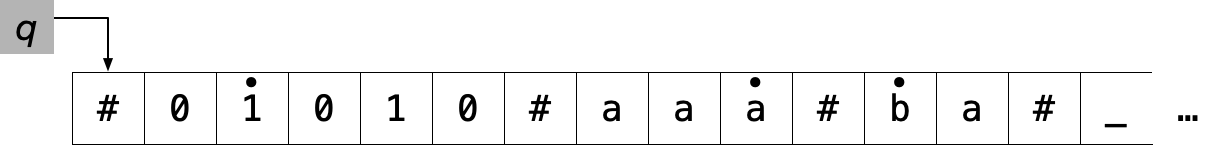

This doesn't constitute a proof; see the book for how to write a proof using an implementation-level description.

### Nondeterminism

<div class="alert alert-info">
    <p><b>Read:</b>
    <ul><li>The definition of configuration (168–169) if you haven't already.</li>
        <li>The subsection "Nondeterministic Turing Machines" (178–180).</li>
    </ul></p>
<p><b>Watch</b> <a href="https://drive.google.com/file/d/11UsPgiK0MFG9ZZZyjUNOF11UgHfLpmva/view?usp=sharing">W8E5: Nondeterministic Turing Machines</a>.</p>
</div>    

We can make Turing machines nondeterministic, similarly to how we made finite automata nondeterministic. Here's an example NTM that recognizes the language $\{ww \mid w \in \{\texttt{0}, \texttt{1}\}^\ast\}$:

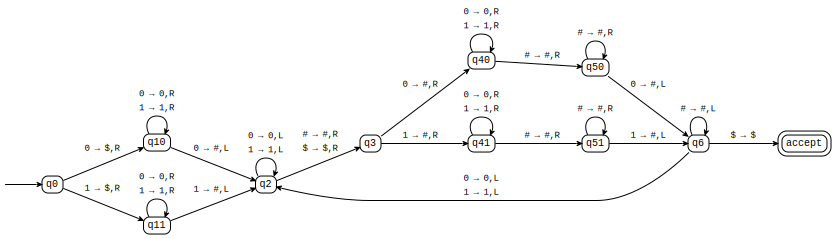

In [12]:
ntm = read_csv("ntm.csv")
ntm

The nondeterminism is in states q10 and q11, which allow the machine to nondeterministically guess where the midpoint of the string is. Here's a graph of all possible runs.

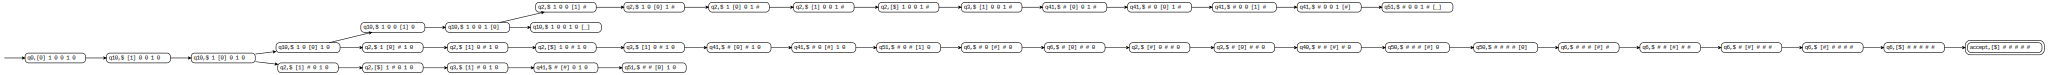

In [13]:
run(ntm, "0 1 0 0 1 0")

And here's the successful path.

In [14]:
run(ntm,"0 1 0 0 1 0").shortest_path()

A NTM accepts a string $w$ iff at least one branch of the computation accepts $w$; the other branches can reject or loop. If all branches reject or loop, the NTM rejects $w$.

Normally we assume that TMs are deterministic, but in this context, we'll call TMs "deterministic TMs" or DTMs for short.

If it were possible to build a real NTM, it would be useful for all kinds of very very practical things, because it would be (we think) so much faster than a DTM. That speed difference is the focus of Unit Four.

But, surprisingly, NTMs are equivalent to DTMs. The proof of Theorem 3.16 treats the computation as a tree. Each node is a configuration, and each edge is a step of the computation. The simulating DTM does a breadth-first search (BFS) on this tree. Each node in the tree is given an address (known as a Gorn address), which is stored on tape 3. The proof is a little bit unclear on one point: Stage 4 just says "Replace the string on tape 3 with the next string in the string ordering," but doesn't explain what the ordering is -- it's the order defined on page 14, which causes the addresses to be listed in breadth-first order.

But here's an alternative proof, which a student in a previous class came up with. It, too, performs a BFS on configurations, but, as you may recall from *Data Structures*, we can implement BFS using a queue, and a tape works very well as a queue. Given a NTM $N$ with start state $s$, construct a (single-tape, deterministic) TM $M =$ "On input $w$:

1. Initialize the tape to the start configuration $\texttt{#}sw\texttt{#}$ and move the head to the left end of the tape.
2. Read the configuration $C$ under the head.
3. If $C$ is an accepting configuration, *accept*.
4. For every configuration $C'$ that $C$ can yield (according to the rules of $N$), append $C'\texttt{#}$ to the right.
5. Erase configuration $C$ and move the head to the next configuration on the tape.
6. If there is no next configuration, *reject*.
7. Goto 2.

This is what the tape might look like after step 4:

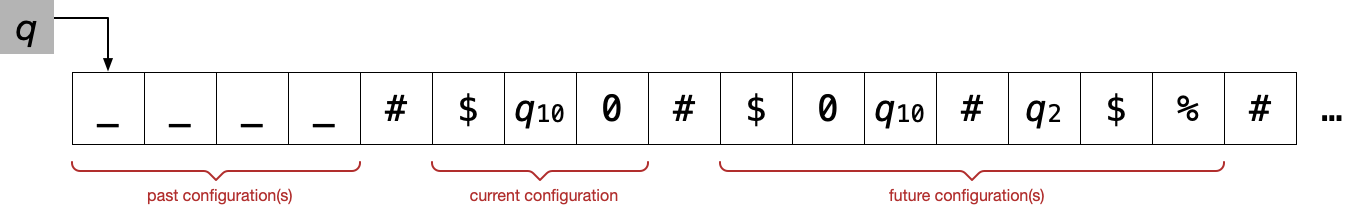

But, surprisingly, NTMs are equivalent to DTMs. The proof of Theorem 3.16 treats the computation as a tree. Each node is a configuration, and each edge is a step of the computation. The simulating DTM does a breadth-first search (BFS) on this tree. Each node in the tree is given an address (known as a Gorn address), which is stored on tape 3. The proof is a little bit unclear on one point: Stage 4 just says "Replace the string on tape 3 with the next string in the string ordering," but doesn't explain what the ordering is -- it's the order defined on page 14, which causes the addresses to be listed in breadth-first order.

But here's an alternative proof, which a student in a previous class came up with. It, too, performs a BFS on configurations, but, as you may recall from *Data Structures*, we can implement BFS using a queue, and a tape works very well as a queue. Given a NTM $N$ with start state $s$, construct a (single-tape, deterministic) TM $M =$ "On input $w$:

1. Initialize the tape to the start configuration $\texttt{#}sw\texttt{#}$ and move the head to the left end of the tape.
2. Read the configuration $C$ under the head.
3. If $C$ is an accepting configuration, *accept*.
4. For every configuration $C'$ that $C$ can yield (according to the rules of $N$), append $C'\texttt{#}$ to the right.
5. Erase configuration $C$ and move the head to the next configuration on the tape.
6. If there is no next configuration, *reject*.
7. Goto 2.

This is what the tape might look like after step 4:

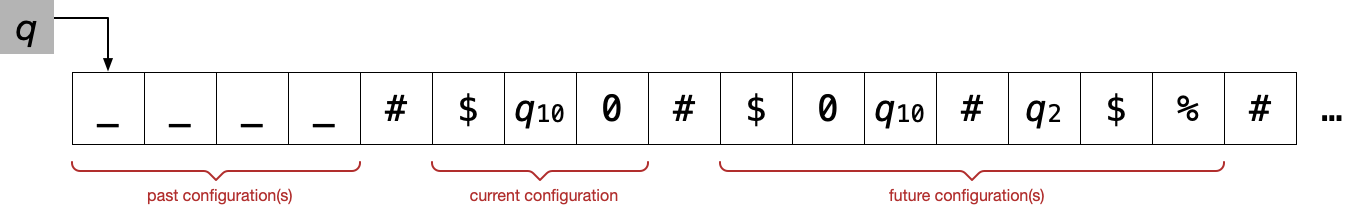

### Random-access memory

An extension that the book does not discuss is *random-access memory*. Standard Turing machines access their memory (tape) by moving a head one location at a time. Extending them to be able to access any memory location results in a new kind of machine, the *RAM machine*, which was defined in [a paper by Cook and Reckhow in 1973](https://doi.org/10.1016/S0022-0000%2873%2980029-7).

<div class="alert alert-info">
<p>You're not responsible for the rest of this section, and you can read it after Thursday's class.</p>
    <p><b>Watch (optional)</b> <a href="https://drive.google.com/file/d/1XKBpT0tl6ny36nP6X66kd34viJl7RPSw/view?usp=sharing">W8E6: RAM Machines and Beyond</a>.</p>
</div>

A RAM machine's memory consists of a tape extending infinitely to the right. The cells are named $X[0], X[1], X[2], \ldots$. But instead of each cell containing a symbol drawn from a finite alphabet, each cell contains a (positive, negative, or zero) integer. 

The states are numbered consecutively from the initial state $0$. Unless otherwise specified, after each operation, the machine goes to the next-numbered state. (Just like assembly language.)

Whereas a Turing machine's operations each consisted of a read, a write, and a move, a RAM machine has the following possible operations:

- $X[i] \leftarrow C$ where $C$ is an integer: write $C$ to memory location $X[i]$.
- $X[i] \leftarrow X[j] + X[k]$: read $X[j]$ and $X[k]$, add them, and write the result in $X[i]$.
- $X[i] \leftarrow X[j] - X[k]$: read $X[j]$ and $X[i]$, subtract them, and write the result in $X[i]$.
- $X[i] \leftarrow X[X[j]]$: read address from $X[j]$, read the contents of that address, and write to $X[i]$.
- $X[X[i]] \leftarrow X[j]$: read $X[j]$, read address from $X[i]$, write $X[i]$ to the contents of that address.
- $\texttt{TRA}~m~\text{if $X[j] > 0$}$: read $X[j]$ and if it's positive, go to state $m$.

A RAM machine can be simulated on a Turing machine. We don't give a full proof here. In Cook and Reckhow's construction, the memory is represented as the tape

$$\$\mathord*a_1\#c_1\mathord*a_2\#c_2\cdots\mathord*a_n\#c_n¢$$

where each $c_i$ is the contents of memory address $a_i$. Additional tapes are used for an address register, a value register, and scratch space. The implementation-level description of a load operation would be:

1. Assume that the address tape contains an address $i$.
2. Scan the memory tape looking for the string $\mathord* i \#$.
3. If found, copy the immediately following value to the value tape.
4. Otherwise, write a $0$ to the value tape.

And a store operation would be:

1. Assume that the address tape contains an address $i$ and the value tape contains a value $x$.
2. Scan the memory tape looking for the string $\mathord* i \#$.
3. If found,
    1. Erase the immediately following value.
    2. Copy the rest of the memory tape to the scratch tape.
    3. Append the value tape to the memory tape.
    4. Append the scratch tape to the memory tape.
4. Otherwise,
    1. Scan right until $¢$ is reached; erase it.
    2. Append $\mathord* i \#$ to the memory tape.
    3. Append the value tape to the memory tape.
    4. Append $¢$ to the memory tape.

It's not hard to figure out how to implement all of the RAM machine's operations in terms of the above load/store operations.

The reason RAM machines are of interest is because RAM machines (not Turing machines) are the theoretical "hardware" that you will use to analyze algorithms in Algorithms class. (But are real computers really more like RAM machines than Turing machines? We'll take this question up again later in Unit IV.)

### Beyond

A RAM machine program looks very much like an assembly language program; could we go further and compile real assembly language, or even a high-level programming language, into Turing machines? 

Indeed we can -- the [ELVM project](https://github.com/shinh/elvm) defines a simple virtual machine with a simple assembly language, EIR, and provides a compiler from (a slightly restricted) C to EIR, as well as backends that translate EIR to various "esoteric languages." We've contributed a Turing machine backend, so it can *compile a C program into a Turing machine.*

In [15]:
!cat hello.c

int putchar(int);

int main() {
  const char* p = "Hello, world.\n";
  for (; *p; p++)
    putchar(*p);
  return 0;
}


Compile this into a TM:
```
$ 8cc -S -o hello.eir hello.c 
$ elc -tm hello.eir > hello.tm
```

In [16]:
!wc -l hello.tm

   62673 hello.tm


In [17]:
%cat hello.tm

// trie for jmp reg
9 _ 10 _ R
11 _ 12 _ R
13 _ 14 _ R
15 _ 16 _ R
17 _ 18 _ R
19 _ 20 _ R
21 _ 22 _ R
23 _ 24 _ R
25 _ 26 _ R
27 _ 28 _ R
29 _ 30 _ R
31 _ 32 _ R
33 _ 34 _ R
35 _ 36 _ R
37 _ 38 _ R
39 _ 40 _ R
41 _ 42 _ R
43 _ 44 _ R
45 _ 46 _ R
47 _ 48 _ R
49 _ 50 _ R
51 _ 52 _ R
53 _ 54 _ R
55 _ 56 _ R
56 0 0 0 R
56 1 1 1 R
54 0 55 0 R
57 _ 58 _ R
58 0 2 0 R
58 1 3 1 R
54 1 57 1 R
52 0 53 0 R
59 _ 60 _ R
61 _ 62 _ R
62 0 4 0 R
62 1 5 1 R
60 0 61 0 R
63 _ 64 _ R
64 0 6 0 R
64 1 7 1 R
60 1 63 1 R
52 1 59 1 R
50 0 51 0 R
48 0 49 0 R
46 0 47 0 R
44 0 45 0 R
42 0 43 0 R
40 0 41 0 R
38 0 39 0 R
36 0 37 0 R
34 0 35 0 R
32 0 33 0 R
30 0 31 0 R
28 0 29 0 R
26 0 27 0 R
24 0 25 0 R
22 0 23 0 R
20 0 21 0 R
18 0 19 0 R
16 0 17 0 R
14 0 15 0 R
12 0 13 0 R
10 0 11 0 R
// beginning-of-tape and input string
0 _ 65 ^ R
0 ^ 65 ^ R
0 $ 65 ^ R
0 0 66 ^ R
0 1 67 ^ R
0 r 65 ^ R
0 a 65 ^ R
0 v 65 ^ R
0 o 65 ^ R
0 s 65 ^ R
0 d 65 ^ R
66 _ 65 0 R
66 ^ 65 0 R
66 $ 65 0 R
66 0 66 0 R
66 1 67 0 R
66 r 65 0 R
66

3123 v 3108 _ N
3123 o 3108 _ N
3123 s 3108 _ N
3123 d 3108 _ N
3108 _ 3108 _ L
3108 ^ 8 ^ N
3108 $ 3108 $ L
3108 0 3108 0 L
3108 1 3108 1 L
3108 r 3108 r L
3108 a 3125 a N
3108 v 3108 v L
3108 o 3108 o L
3108 s 3108 s L
3108 d 3108 d L
3125 _ 3126 _ R
3125 ^ 3126 ^ R
3125 $ 3126 $ R
3125 0 3126 0 R
3125 1 3126 1 R
3125 r 3126 r R
3125 a 3126 a R
3125 v 3126 v R
3125 o 3126 o R
3125 s 3126 s R
3125 d 3126 d R
3126 _ 3127 _ N
3126 ^ 3127 ^ N
3126 $ 3127 $ N
3126 0 3128 0 R
3126 1 3129 1 R
3126 r 3127 r N
3126 a 3127 a N
3126 v 3127 v N
3126 o 3127 o N
3126 s 3127 s N
3126 d 3127 d N
3128 _ 8 _ N
3128 ^ 8 ^ N
3128 $ 8 $ N
3128 0 3126 0 R
3128 1 3124 1 R
3128 r 8 r N
3128 a 8 a N
3128 v 8 v N
3128 o 8 o N
3128 s 8 s N
3128 d 8 d N
3129 _ 8 _ N
3129 ^ 8 ^ N
3129 $ 8 $ N
3129 0 3124 0 R
3129 1 3126 1 R
3129 r 8 r N
3129 a 8 a N
3129 v 8 v N
3129 o 8 o N
3129 s 8 s N
3129 d 8 d N
3127 _ 3130 _ R
3127 ^ 3130 ^ R
3127 $ 3130 $ R
3127 0 3130 0 R
3127 1 3130 1 R
3127 r 3130 r R
3127 a 3130 a R
3

Simplified state diagram (no transition labels):

![Hello world Turing machine](hello.svg)

We've also contributed a Turing machine simulator, written in C; specifically, the subset of C supported by 8cc.

In [18]:
!wc -l tm.c

     369 tm.c


In [19]:
%cat tm.c

/* Simulator for deterministic Turing machines.

   Usage: tm [-b] [-n] [-v|-vv] <tm-file> 

   where <tm-file> contains a description of a Turing machine. Each
   line in the machine description specifies a transition:

   q a r b d

   where 
   - q is the current state
   - a is the symbol read from the tape
   - r is the new state
   - b is the symbol written to the tape
   - d is a direction: L (left), N (no move), or R (right)

   A state can be any integer. The start state is 0. The accept state
   is -1.

   A symbol can be any non-whitespace character. The blank symbol is
   _.

   The input string is read from stdin:

   - If the -b switch is given, the input bytes are encoded on the
     tape in binary, most significant bit first. For example, "ABC"
     would be encoded as 010000010100001001000011___.... Machines
     compiled from EIR should be run with this switch.

   - If the -n switch is given, nothing is read from stdin, and the
     input string is empty.

   The tap

So...what happens if we run the C-to-TM compiler on the TM simulator?

```
$ 8cc -S -o tm.eir tm.c 
$ elc -tm tm.eir > tm.tm
$ cut -d' ' -f1 tm.tm | sort -n | uniq | wc -l # count states
 1201036
$ wc -l tm.tm # count transitions
 13052703 tm.tm
```

(Just `#include <stdio.h>` generates almost 9 million transitions, so there are probably a lot of unused transitions in there!)